In [35]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [36]:
# grab file paths
city_data_path = os.path.join('Data', 'city_data.csv')
ride_data_path = os.path.join('Data', 'ride_data.csv')

In [37]:
# read csvs
city_data = pd.read_csv(city_data_path)
ride_data = pd.read_csv(ride_data_path)

In [38]:
# create dataframes
city_df = pd.DataFrame(city_data)
ride_df = pd.DataFrame(ride_data)

In [39]:
# get total number of rides per city
city_group_df = ride_df.groupby('city').count()

In [40]:
# get average fare per city
city_avg_df = ride_df.groupby('city').mean()

In [41]:
# remove unecessary columns
city_avg_df = city_avg_df.iloc[:, 0]

In [42]:
# convert back to dataframe
city_avg_df = pd.DataFrame(city_avg_df)

In [43]:
# add average fare column to grouped city dataframe
city_group_df['Average Fare'] = city_avg_df['fare']

In [44]:
# rename columns to reflect count
city_group_df = city_group_df.rename(columns={'date' : 'Total Number of Rides'})

In [45]:
# delete unneeded columns
del city_group_df['fare']
del city_group_df['ride_id']

In [46]:
# remove duplicate city and keep the first occurance
city_df = city_df.drop_duplicates(subset='city',keep='first')

In [47]:
# set index to city
city_df.set_index('city', inplace=True)

In [48]:
# add driver count row to grouped df
city_group_df['Driver Count'] = city_df['driver_count']
city_group_df.head()

,Total Number of Rides,Average Fare,Driver Count
city,,,
Alvarezhaven,31,23.928710,21
Alyssaberg,26,20.609615,67
Anitamouth,9,37.315556,16
Antoniomouth,22,23.625000,21
Aprilchester,19,21.981579,49


In [49]:
# add city type to grouped df
city_group_df['Type'] = city_df['type']

In [50]:
# initialize lists
urban_x = []
urban_y = []
urban_drivers = []
suburban_x = []
suburban_y = []
suburban_drivers = []
rural_x = []
rural_y = []
rural_drivers = []

In [51]:
# fill lists with data
for index, row in city_group_df.iterrows():
    if row['Type'] == 'Suburban':
        suburban_x.append(row['Total Number of Rides'])
        suburban_y.append(row['Average Fare'])
        suburban_drivers.append(row['Driver Count'])
    elif row['Type'] == 'Urban':
        urban_x.append(row['Total Number of Rides'])
        urban_y.append(row['Average Fare'])
        urban_drivers.append(row['Driver Count'])
    elif row['Type'] == 'Rural':
        rural_x.append(row['Total Number of Rides'])
        rural_y.append(row['Average Fare'])
        rural_drivers.append(row['Driver Count'])

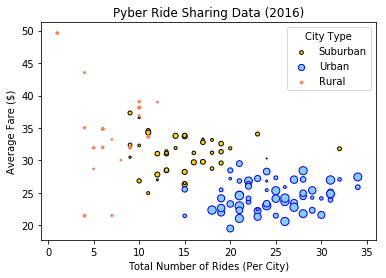

In [52]:
# make bubble chart
plt.scatter(suburban_x, suburban_y, s=suburban_drivers, label='Suburban', color='#FFD700', edgecolor='black')
plt.scatter(urban_x, urban_y, s=urban_drivers, label='Urban', color='#87CEFA', edgecolor='blue')
plt.scatter(rural_x, rural_y, s=rural_drivers, label='Rural', color='#FF7F50')
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title='City Type', loc='best')
plt.show()

In [53]:
city_type_group = city_group_df.groupby('Type').sum()
city_type_group.head()

,Total Number of Rides,Average Fare,Driver Count
Type,,,
Rural,125,615.728572,104
Suburban,625,1268.627391,635
Urban,1625,1623.863390,2607


In [54]:
total_rides = city_type_group['Total Number of Rides'].sum()
total_fares = city_type_group['Average Fare'].sum()
total_drivers = city_type_group['Driver Count'].sum()

In [55]:
city_type_group['% of Rides'] = (city_type_group['Total Number of Rides'] / total_rides) * 100
city_type_group['% of Fares'] = (city_type_group['Average Fare'] / total_fares) * 100
city_type_group['% of Drivers'] = (city_type_group['Driver Count'] / total_drivers) * 100

In [56]:
# get index as labels
labels = city_type_group.index.tolist()
# initalize lists
ride_pieces = []
fare_pieces = []
driver_pieces = []

In [57]:
# fill lists with data
for index, row in city_type_group.iterrows():
    ride_pieces.append(row['% of Rides'])
    fare_pieces.append(row['% of Fares'])
    driver_pieces.append(row['% of Drivers'])

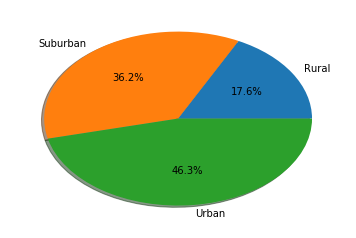

In [58]:
# create pie chart based on fares
# TODO: format
plt.pie(fare_pieces, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

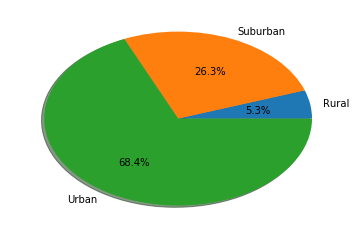

In [59]:
# create pie chart based on rides
plt.pie(ride_pieces, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

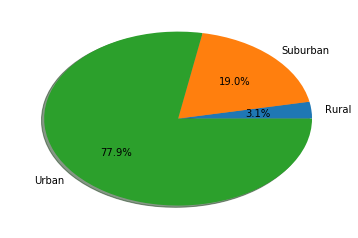

In [60]:
# create pie chart based on drivers
plt.pie(driver_pieces, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()